# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: Einlesen und Funktionpruefung der Pipeline zum Daten aus File Ordner Messung mittels Polars ueberpruefen und einlesen

## Libraries Importieren

In [1]:
%pip install -r requirements.txt
from data_ingestion.pipeline_manager import PipelineRunner as PipelineRunner 
from data_ingestion import utilities as util
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import pandas as pd

You should consider upgrading via the 'c:\Users\Si Ben Tran\venv\cdl1\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: polars==0.16.2 in c:\users\si ben tran\venv\cdl1\lib\site-packages (from -r requirements.txt (line 1)) (0.16.2)



## Read Data with Pipeline

In [2]:
path = "Messungen"
pipeline = None
origin = "SensorLogger"

runner = PipelineRunner(path)
runner.set_origin(origin)
runner.set_pipeline(pipeline)
data = runner.run()
path: pathlib.Path = "Export.arrow"
data.write_ipc(path)
display(data)

Read Files:   0%|          | 0/282 [00:00<?, ?files/s]

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
2023-02-27 15:02:04.548,0.0,-3.552,-9.14,null,null,null,null,null,null,0.161765,-0.08829,-0.470671,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:17.156,0.0,9.722,1.278,null,null,null,null,null,null,-0.21775,-0.719579,0.631111,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:31.574,-0.728,9.779,0.0,null,null,null,null,null,null,-0.42065,0.568356,-0.598058,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:16.685,null,null,null,null,null,null,0.0,43.5,-13.14375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:32.295,null,null,null,null,null,null,-13.012501,0.0,20.587502,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:33.285,null,null,null,null,null,null,-22.612501,0.0,20.268751,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:35.195,null,null,null,null,null,null,-12.1125,0.0,20.75625,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:45.315,null,null,null,null,null,null,-21.243752,0.0,16.9125,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:48.985,null,null,null,null,null,null,-41.100002,0.0,-3.24375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""


## Export Data to csv

In [3]:
# export data to csv for better readability
# convert polars dataframe to pandas dataframe
data_pd = data.to_pandas()

# create a new column with the combined columns id, user and class
data_pd['id_combined'] = data_pd['id'] + data_pd['user'] + data_pd['class']

# display data_pd head()
data_pd.head()

# export to csv
data_pd.to_csv('Alle_Messungen.csv')


## Functions Visualize

In [9]:
# create 3 subplots for each accelerometer axis
def plot_accelerometer_data(data, multipleplots=True, alpha=0.5):
    '''
    plot accelerometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("acceleration over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("acceleration")
        axs.set_title("acceleration over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        plt.show()

# create 3 subplots for each Gyroscope axis
def plot_gyroscope_data(data, multipleplots=True, alpha=0.5):
    '''
    plot accelerometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Gyroscope_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("Gyroscope over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Gyroscope_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("Gyroscope")
        axs.set_title("Gyroscope over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        plt.show()

# create 3 subplots for each Gyroscope axis
def plot_magnetometer_data(data, multipleplots=True, alpha=0.5):
    '''
    plot Magnetometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Magnetometer_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("Magnetometer over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Magnetometer_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("Magnetometer")
        axs.set_title("Magnetometer over time: " + data['user'].unique()[0] + " - " + data['class'].unique()[0])
        fig.text(0.99, 0.01, 'file: ' + data['id'].unique()[0], ha='right', va='bottom')
        plt.show()

# create function for plotting all sensor data
def plot_all_sensor_data(data, multiplots=True, alpha=0.5):
    '''
    plot all sensor data
    data: polars dataframe
    multiplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    plot_accelerometer_data(data, multiplots, alpha)
    plot_gyroscope_data(data, multiplots, alpha)
    plot_magnetometer_data(data, multiplots, alpha)

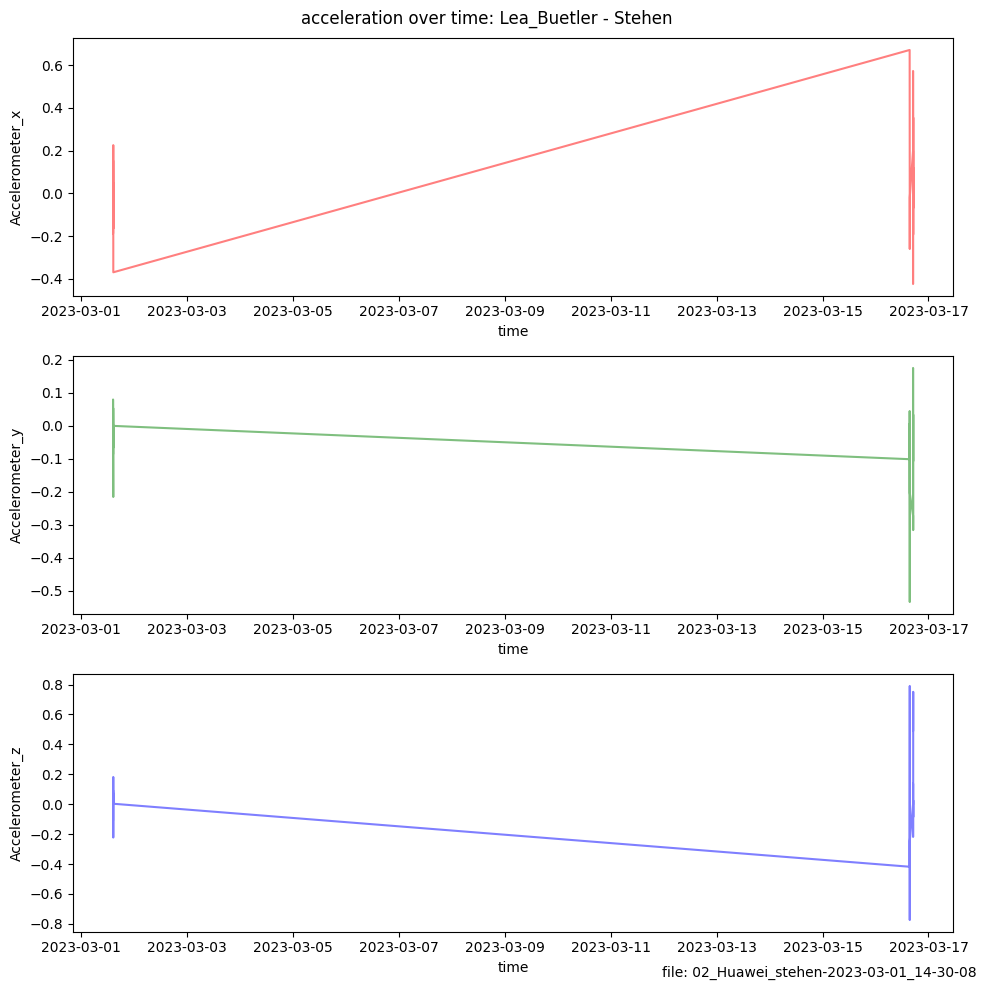

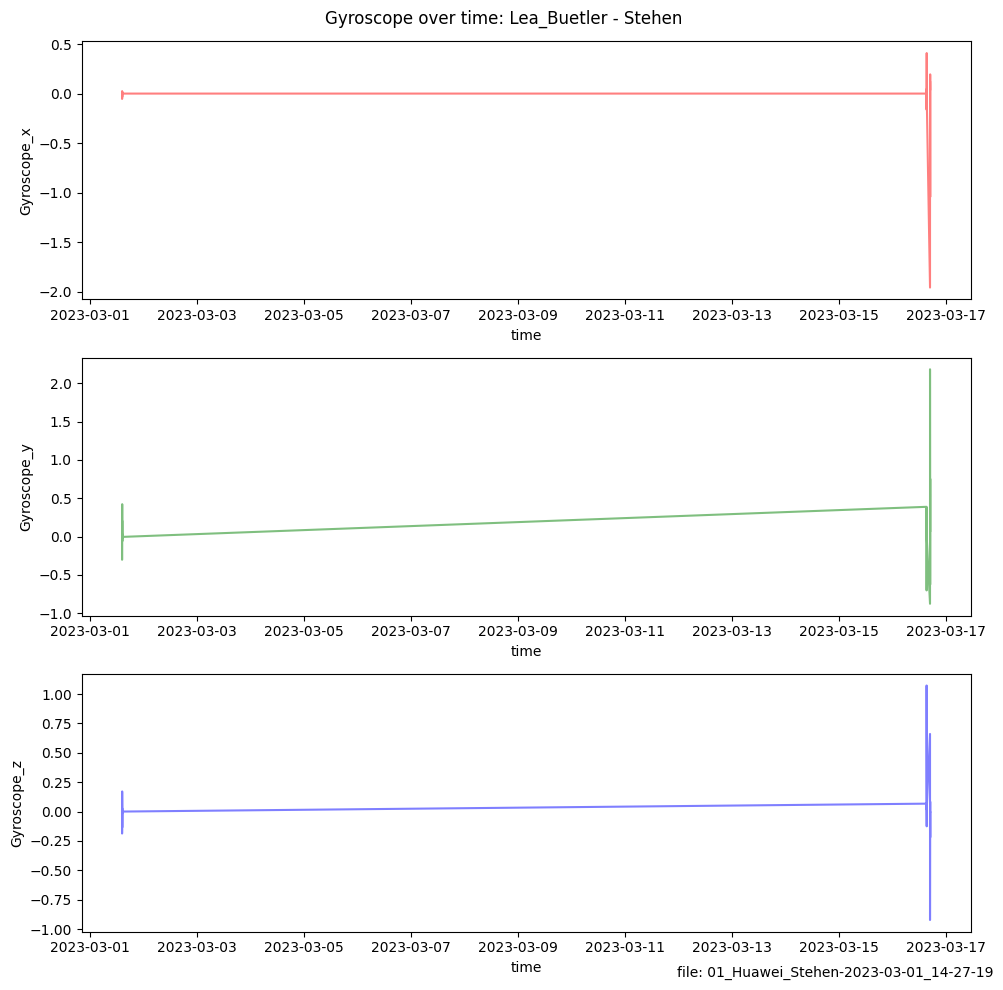

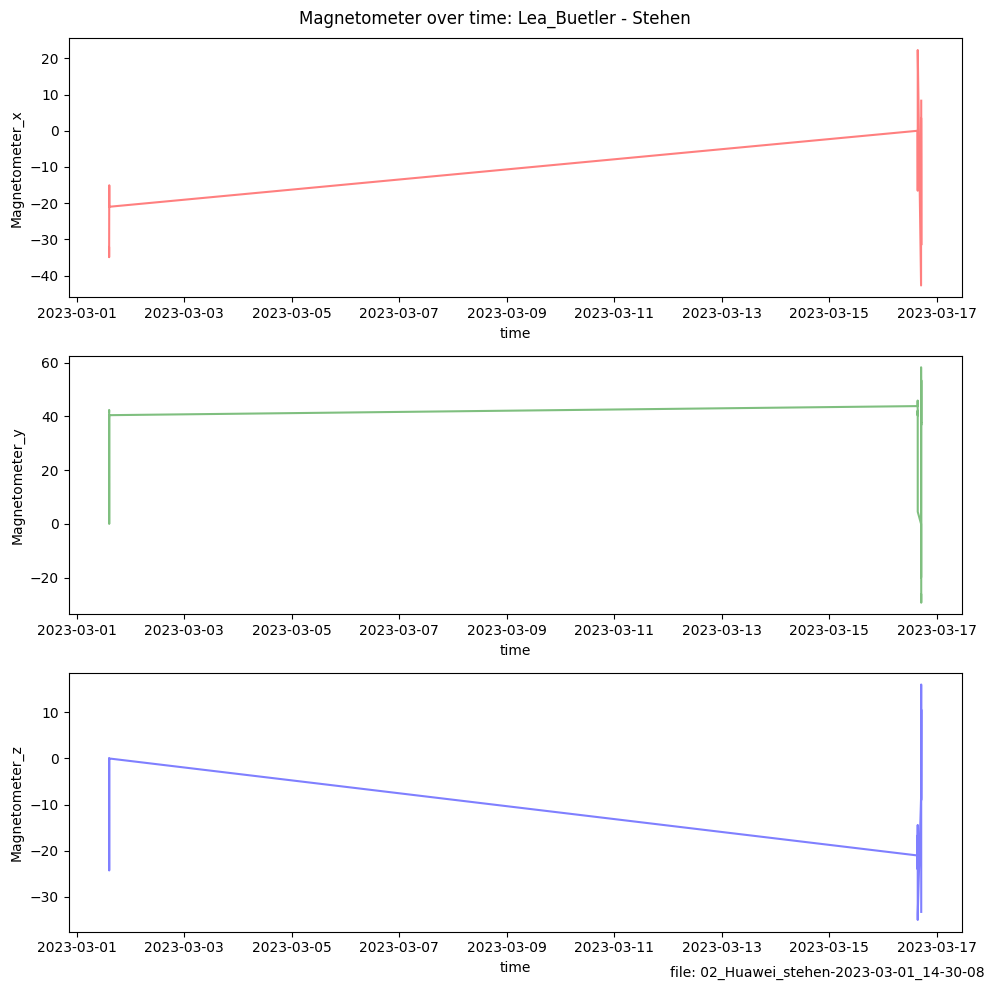

In [10]:
vis_data = data.filter(pl.col('user') == "Lea_Buetler").filter(pl.col('class') == "Stehen")
plot_all_sensor_data(vis_data)

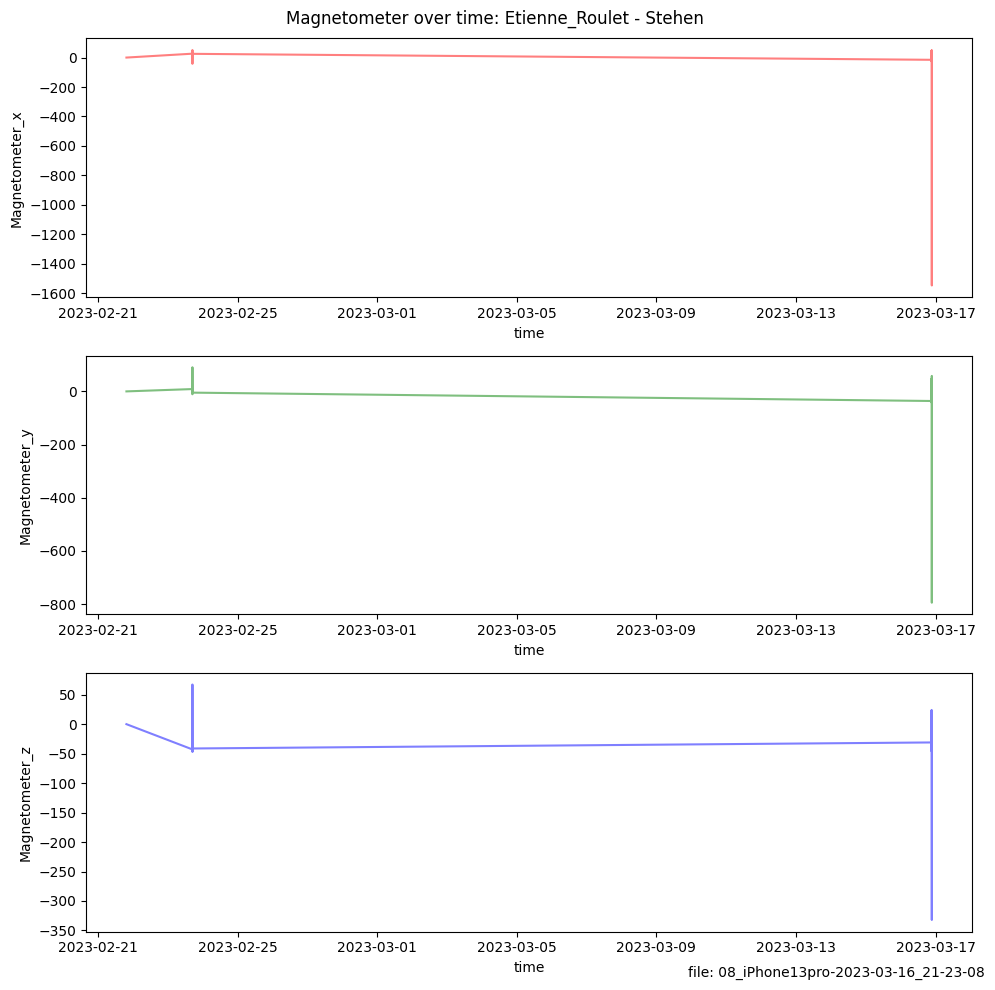

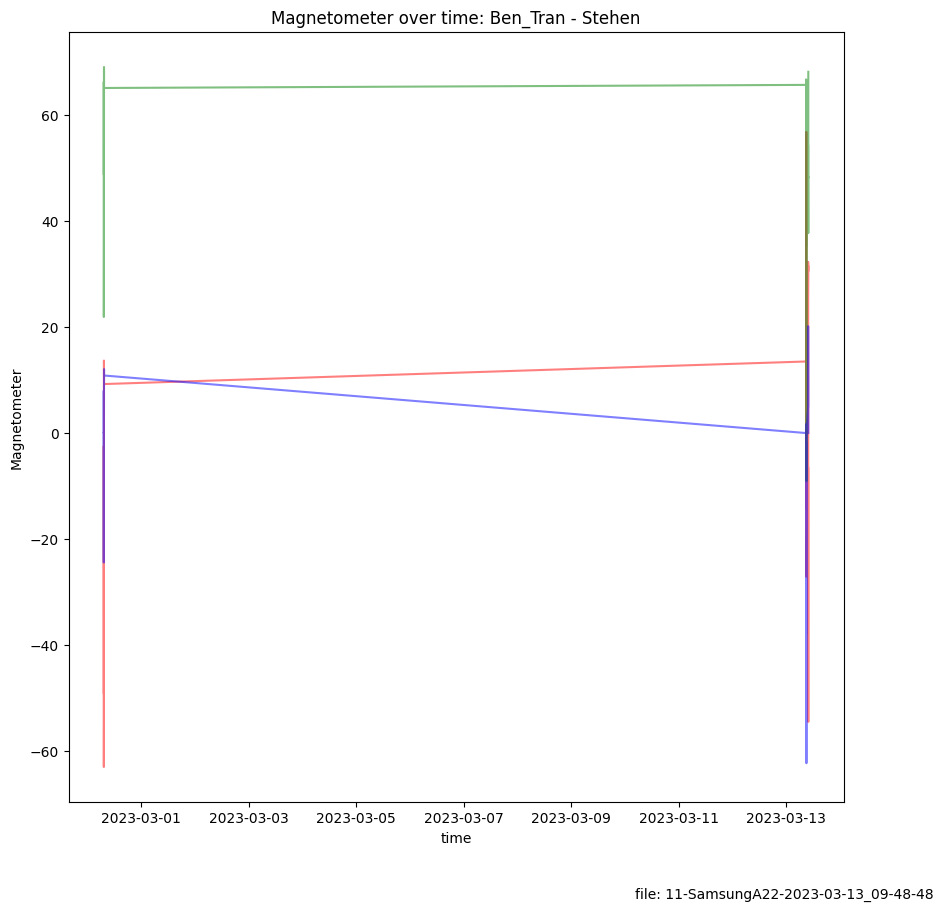

In [7]:
# filter data
vis_data = data.filter(pl.col("user") == "Etienne_Roulet").filter(pl.col("class") == "Stehen")
plot_magnetometer_data(vis_data, multipleplots=True, alpha = 0.5)

vis_data = data.filter(pl.col("user") == "Ben_Tran").filter(pl.col("class") == "Stehen")
plot_magnetometer_data(vis_data, multipleplots=False, alpha = 0.5)

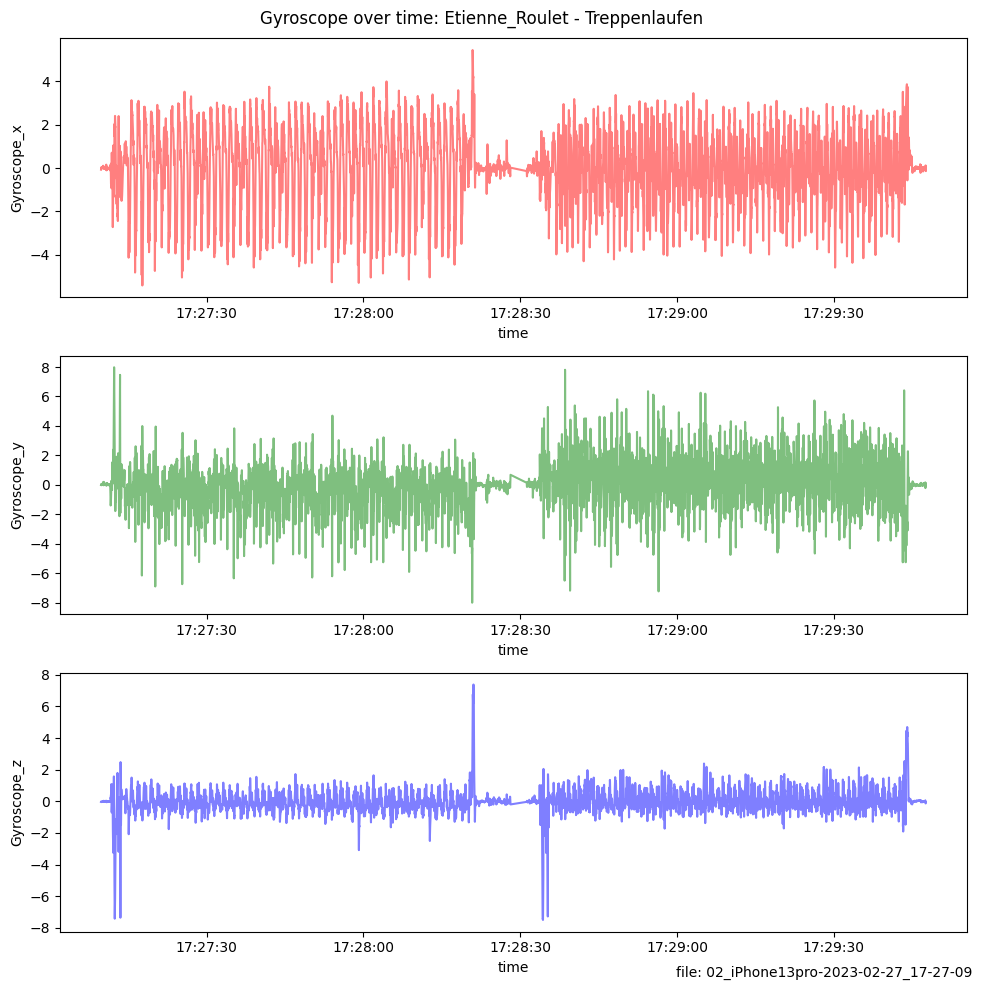

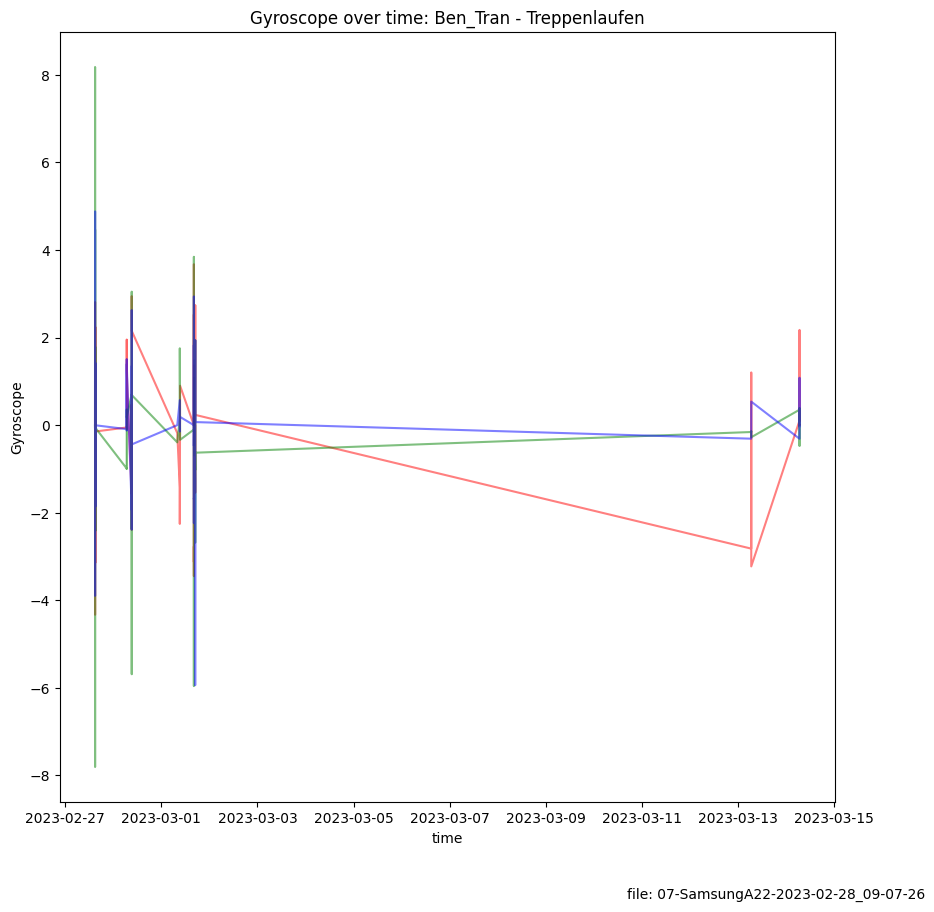

In [11]:
vis_data = data.filter(pl.col("user") == "Etienne_Roulet").filter(pl.col("class") == "Treppenlaufen")
plot_gyroscope_data(vis_data, multipleplots=True, alpha = 0.5)

vis_data = data.filter(pl.col('user') == "Ben_Tran").filter(pl.col("class") == "Treppenlaufen")
plot_gyroscope_data(vis_data, multipleplots=False, alpha = 0.5)

## Example for converting to Tensor with Tensorflow

In [12]:
A = util.State.to_numpy([
    util.State(util.User.ETIENNE, util.Activity.SITZEN),
    util.State(util.User.BEN, util.Activity.STEHEN),
    util.State(util.User.LEA, util.Activity.LAUFEN),
    util.State(util.User.FLORIN, util.Activity.RENNEN),
    util.State(util.User.GABRIEL, util.Activity.FAHRRAD),
    util.State(util.User.MANJAVY, util.Activity.TREPPENGEHEN),
    util.State(util.User.OGNJEN, util.Activity.SITZEN),
    util.State(util.User.TOBIAS, util.Activity.STEHEN),
    util.State(util.User.WEIPING, util.Activity.LAUFEN),  
 ], batch=True)

tf.convert_to_tensor(A)

<tf.Tensor: shape=(9, 16), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)>